In [2]:
from mtcnn.mtcnn import MTCNN
from PIL import Image
from numpy import asarray
from os import listdir
from matplotlib import pyplot
import tensorflow as tf 
from numpy import savez_compressed

In [3]:
# 주어진 사진에서 얼굴을 추출 
def extract_face(filename, required_size=(160, 160)):
	image = Image.open(filename) #파일에서 이미지 로드
	image = image.convert('RGB') #RGB로 바꾸는 작업
	pixels = asarray(image)#넘파이 배열로 바꾸는 작업
	detector = MTCNN()  #MTCNN 호출
	results = detector.detect_faces(pixels) #MTCNN을 거친 결과를 저장
	x1, y1, width, height = results[0]['box'] #첫번째 얼굴에서 경계상자 추출
	# 버그 수정
	x1, y1 = abs(x1), abs(y1) #음의 픽셀 인덱스를 반환 대비용
	x2, y2 = x1 + width, y1 + height 
	face = pixels[y1:y2, x1:x2] #얼굴 추출
	# resize pixels to the model size
	image = Image.fromarray(face) #NumPy배열을 Image객체로 바꿀때 사용
	image = image.resize(required_size) #이미지 크기 변환
	face_array = asarray(image)
	return face_array

In [11]:
#folder = '5-celebrity-faces-dataset/train/ben_afflek/'
train_folder = 'dataset/train/'
test_folder = 'dataset/test/'
i = 1

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)
14 (160, 160, 3)


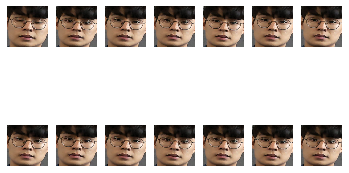

In [10]:
# enumerate files
for filename in listdir(folder):
	path = folder + filename
	# get face
	face = extract_face(path)
	print(i, face.shape)
	pyplot.subplot(2, 7, i)
	pyplot.axis('off')
	pyplot.imshow(face)
	i += 1
pyplot.show()

In [7]:
# load images and extract faces for all images in a directory
def load_faces(directory):
	faces = list()
	for filename in listdir(directory):
		path = directory + filename
		face = extract_face(path)
		faces.append(face)
	return faces

In [15]:
def load_dataset(directory):
	X, y = list(), list()
	# enumerate folders, on per class
	for subdir in listdir(directory):
		# path
		path = directory 
		# skip any files that might be in the dir
		if not listdir(path):
			continue
		# load all faces in the subdirectory
		faces = load_faces(path)
		# create labels
		labels = [subdir for _ in range(len(faces))]
		# summarize progress
		print('>loaded %d examples for class: %s' % (len(faces), subdir))
		# store
		X.extend(faces)
		y.extend(labels)
	return asarray(X), asarray(y)

In [16]:
# load train dataset
trainX, trainy = load_dataset(train_folder)
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset(test_folder)
print(testX.shape, testy.shape)

>loaded 14 examples for class: minsu.1.jpg
>loaded 14 examples for class: minsu.10.jpg
>loaded 14 examples for class: minsu.11.jpg
>loaded 14 examples for class: minsu.12.jpg
>loaded 14 examples for class: minsu.13.jpg
>loaded 14 examples for class: minsu.14.jpg
>loaded 14 examples for class: minsu.2.jpg
>loaded 14 examples for class: minsu.3.jpg
>loaded 14 examples for class: minsu.4.jpg
>loaded 14 examples for class: minsu.5.jpg
>loaded 14 examples for class: minsu.6.jpg
>loaded 14 examples for class: minsu.7.jpg
>loaded 14 examples for class: minsu.8.jpg
>loaded 14 examples for class: minsu.9.jpg
(196, 160, 160, 3) (196,)
>loaded 6 examples for class: minsu.1.jpg
>loaded 6 examples for class: minsu.2.jpg
>loaded 6 examples for class: minsu.3.jpg
>loaded 6 examples for class: minsu.4.jpg
>loaded 6 examples for class: minsu.5.jpg
>loaded 6 examples for class: minsu.6.jpg
(36, 160, 160, 3) (36,)


In [17]:
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)